## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 5712 files belonging to 4 classes.


## validating image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 1311 files belonging to 4 classes.


In [4]:
for x,y in training_set :
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[2.   2.   2.  ]
   [2.   2.   2.  ]
   [2.   2.   2.  ]
   ...
   [2.   2.   2.  ]
   [2.   2.   2.  ]
   [2.   2.   2.  ]]

  ...

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [2.   2.   2.  ]
   ...
   [3.   3.   3.  ]
   [2.   2.   2.  ]
   [2.   2.   2.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]]


 [[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0

### Building Model


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

## Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\neera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
##output layer
model.add(Dense(units=4,activation='softmax'))

## compiling model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

## Class Names


In [19]:
class_name = validation_set.class_names
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

# Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set, epochs = 10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.4886 - loss: 1.2434 - val_accuracy: 0.6804 - val_loss: 0.7794
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 126s 706ms/step - accuracy: 0.7660 - loss: 0.5868 - val_accuracy: 0.8009 - val_loss: 0.5143
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 131s 729ms/step - accuracy: 0.8293 - loss: 0.4443 - val_accuracy: 0.8253 - val_loss: 0.4338
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 743ms/step - accuracy: 0.8874 - loss: 0.2997 - val_accuracy: 0.8947 - val_loss: 0.2868
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 775ms/step - accuracy: 0.9149 - loss: 0.2354 - val_accuracy: 0.8978 - val_loss: 0.2891
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 762ms/step - accuracy: 0.9439 - loss: 0.1598 - val_accuracy: 0.8863 - val_loss: 0.3398
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 137s 765ms/step - accuracy: 0.9596 - loss: 0.1285 - val_accuracy: 0.9649 - val_loss: 0.0985
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 762ms/step - accuracy: 0.9767 - lo

## Model evaluation


In [21]:
train_loss,train_acc = model.evaluate(training_set)

179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9893 - loss: 0.0310


In [22]:
print(train_loss,train_acc)

0.025948304682970047 0.9922969341278076


In [23]:
val_loss,val_acc = model.evaluate(validation_set)

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.9667 - loss: 0.1092


In [24]:
print(val_loss,val_acc)

0.10645784437656403 0.9641494750976562


# saving model

In [25]:
model.save("trained_model8.keras")

In [26]:
training_history.history

{'accuracy': [0.6153711676597595,
  0.7927170991897583,
  0.8501400351524353,
  0.9016106724739075,
  0.9247198700904846,
  0.9501050710678101,
  0.9627100825309753,
  0.9765406250953674,
  0.9872198700904846,
  0.9837185144424438],
 'loss': [0.9134860634803772,
  0.5246232151985168,
  0.39321964979171753,
  0.2664293050765991,
  0.20564059913158417,
  0.1397353708744049,
  0.11127466708421707,
  0.06968772411346436,
  0.0424279160797596,
  0.04741159453988075],
 'val_accuracy': [0.6803966164588928,
  0.8009153604507446,
  0.8253241777420044,
  0.8947368264198303,
  0.8977879285812378,
  0.8863462805747986,
  0.9649122953414917,
  0.9610983729362488,
  0.9649122953414917,
  0.9641494750976562],
 'val_loss': [0.7793969511985779,
  0.5142787098884583,
  0.433752179145813,
  0.28682276606559753,
  0.2891179621219635,
  0.33979490399360657,
  0.09852813929319382,
  0.12135688215494156,
  0.11887091398239136,
  0.10645784437656403]}

In [27]:
import json 
with open("Training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

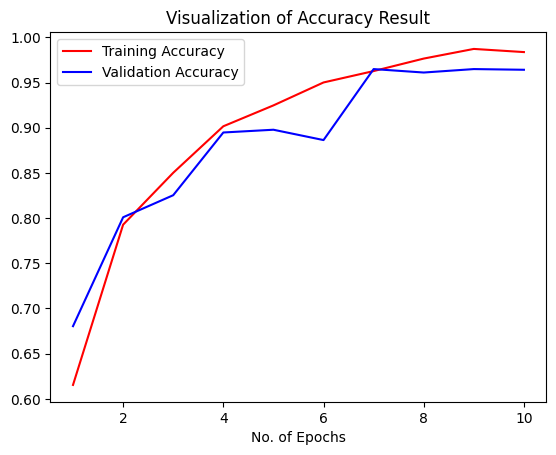

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Testing Model

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 1311 files belonging to 4 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step


array([[9.7127718e-01, 2.0028283e-03, 2.3241352e-02, 3.4786367e-03],
       [8.2981408e-01, 4.0504456e-02, 1.4278475e-04, 1.2953871e-01],
       [9.9555933e-01, 4.1126688e-03, 1.5749631e-05, 3.1217525e-04],
       ...,
       [1.7428427e-05, 1.1359519e-02, 8.0124992e-05, 9.8854291e-01],
       [4.0256182e-06, 2.0211612e-05, 9.6569458e-08, 9.9997556e-01],
       [2.5193916e-10, 8.1893340e-08, 1.5262365e-09, 9.9999988e-01]],
      dtype=float32)

In [32]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

## Confusion Matrix Visualization

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

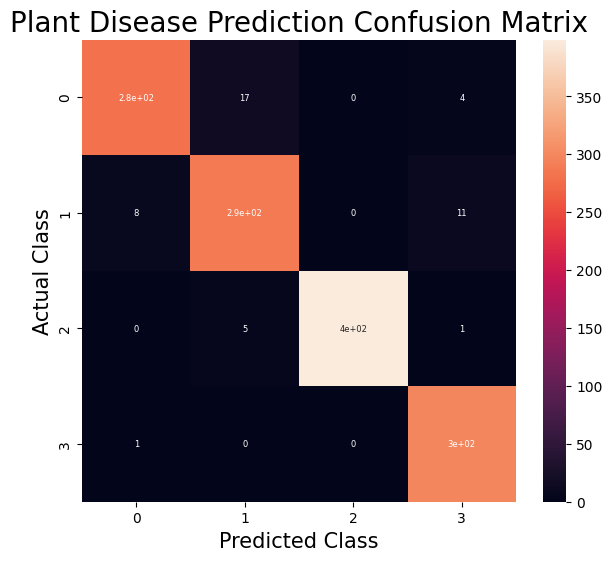

In [35]:
plt.figure(figsize=(7, 6))
sns.heatmap(cm,annot=True,annot_kws={"size": 6})

plt.xlabel('Predicted Class',fontsize = 15)
plt.ylabel('Actual Class',fontsize = 15)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 20)
plt.show()